# Email Campaign

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('ggplot')

In [137]:
emails = pd.read_csv("email_table.csv",index_col="email_id")


In [138]:
emails["response"] = "received"

open_users = pd.read_csv("email_opened_table.csv").email_id
emails.loc[open_users,"response"] = "opened"

click_users = pd.read_csv("link_clicked_table.csv").email_id
emails.loc[click_users,"response"] = 'clicked'



In [139]:
emails.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,response
email_id,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,received
966622,long_email,personalized,12,Sunday,UK,2,clicked
777221,long_email,personalized,11,Wednesday,US,2,received
493711,short_email,generic,6,Monday,UK,1,received
106887,long_email,generic,14,Monday,US,6,received


In [140]:
rate = emails.response.value_counts(normalize=True)
print "{:.2f}% of users opened the email".format((1 - rate.received) * 100)
print "{:.2f}% of users clicked the link".format(rate.clicked * 100)

10.39% of users opened the email
2.12% of users clicked the link


## Max the click rate

In [141]:
response = pd.get_dummies(emails['response'],prefix = 'response')
df = pd.concat([emails,response],axis = 1)
df.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,response,response_clicked,response_opened,response_received
email_id,,,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,received,0,0,1
966622,long_email,personalized,12,Sunday,UK,2,clicked,1,0,0
777221,long_email,personalized,11,Wednesday,US,2,received,0,0,1
493711,short_email,generic,6,Monday,UK,1,received,0,0,1
106887,long_email,generic,14,Monday,US,6,received,0,0,1


In [142]:
text = pd.get_dummies(emails['email_text'])
df1 = pd.concat([df,text],axis = 1)
df1.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,response,response_clicked,response_opened,response_received,long_email,short_email
email_id,,,,,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,received,0,0,1,0,1
966622,long_email,personalized,12,Sunday,UK,2,clicked,1,0,0,1,0
777221,long_email,personalized,11,Wednesday,US,2,received,0,0,1,1,0
493711,short_email,generic,6,Monday,UK,1,received,0,0,1,0,1
106887,long_email,generic,14,Monday,US,6,received,0,0,1,1,0


In [143]:
del df1['short_email']

In [144]:
version = pd.get_dummies(emails['email_version'])
df2 = pd.concat([df1,version],axis = 1)
df2.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,response,response_clicked,response_opened,response_received,long_email,generic,personalized
email_id,,,,,,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,received,0,0,1,0,0,1
966622,long_email,personalized,12,Sunday,UK,2,clicked,1,0,0,1,0,1
777221,long_email,personalized,11,Wednesday,US,2,received,0,0,1,1,0,1
493711,short_email,generic,6,Monday,UK,1,received,0,0,1,0,1,0
106887,long_email,generic,14,Monday,US,6,received,0,0,1,1,1,0


In [145]:
del df2['generic']

In [146]:
country = pd.get_dummies(emails['user_country'])
df3 = pd.concat([df2,country],axis = 1)
df3.head()

,email_text,email_version,hour,weekday,user_country,user_past_purchases,response,response_clicked,response_opened,response_received,long_email,personalized,ES,FR,UK,US
email_id,,,,,,,,,,,,,,,,
85120,short_email,personalized,2,Sunday,US,5,received,0,0,1,0,1,0,0,0,1
966622,long_email,personalized,12,Sunday,UK,2,clicked,1,0,0,1,1,0,0,1,0
777221,long_email,personalized,11,Wednesday,US,2,received,0,0,1,1,1,0,0,0,1
493711,short_email,generic,6,Monday,UK,1,received,0,0,1,0,0,0,0,1,0
106887,long_email,generic,14,Monday,US,6,received,0,0,1,1,0,0,0,0,1


In [147]:
del df3['US']

In [148]:
df3.to_csv('clean.csv')

In [190]:
clean = pd.read_csv('clean.csv')

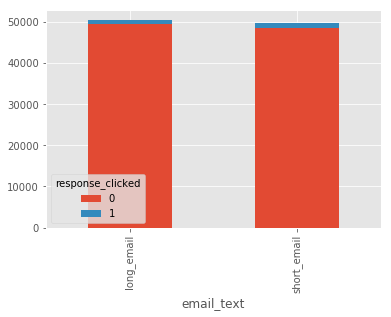

In [191]:
text = clean.groupby(['email_text','response_clicked']).count()['email_id']
text = text.reset_index().pivot(index = 'email_text', columns = 'response_clicked', values = 'email_id')
text.plot(kind='bar', stacked=True)

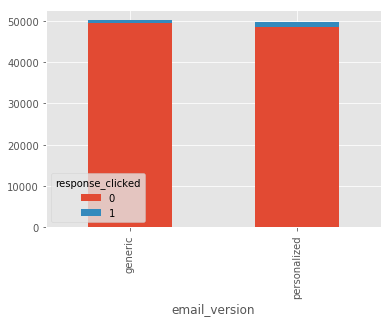

In [43]:
version = clean.groupby(['email_version','response_clicked']).count()['email_id']
version = version.reset_index().pivot(index = 'email_version', columns = 'response_clicked', values = 'email_id')
version.plot(kind='bar', stacked=True)

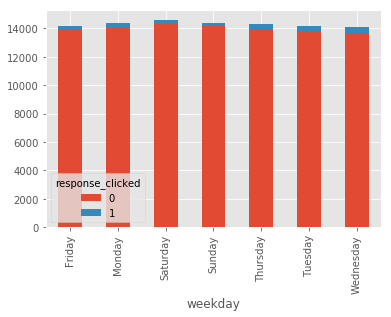

In [45]:
weekday = clean.groupby(['weekday','response_clicked']).count()['email_id']
weekday = weekday.reset_index().pivot(index = 'weekday', columns = 'response_clicked', values = 'email_id')
weekday.plot(kind='bar', stacked=True)

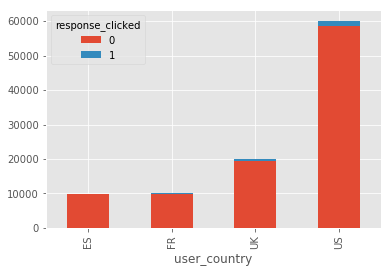

In [46]:
user_country = clean.groupby(['user_country','response_clicked']).count()['email_id']
user_country = user_country.reset_index().pivot(index = 'user_country', columns = 'response_clicked', values = 'email_id')
user_country.plot(kind='bar', stacked=True)

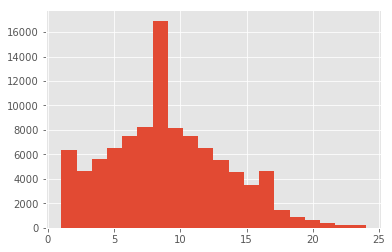

In [50]:
clean.hour.hist(bins = 20)

In [51]:
clean.hour.value_counts()

9     8529
8     8398
7     8204
10    8180
11    7483
6     7465
5     6551
12    6508
4     5622
13    5581
3     4610
14    4580
2     3676
15    3493
16    2759
1     2703
17    1893
18    1421
19     905
20     656
21     365
22     204
23     145
24      69
Name: hour, dtype: int64

In [192]:
def week(row):
    if row['weekday'] in ('Sunday','Saturday') :
        return 'week_end'
    
    else:
        return 'week_day'

In [193]:
clean['week']  = clean.apply (lambda row: week(row), axis=1)

In [194]:
clean.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,response,response_clicked,response_opened,response_received,long_email,personalized,ES,FR,UK,week
0,85120,short_email,personalized,2,Sunday,US,5,received,0,0,1,0,1,0,0,0,week_end
1,966622,long_email,personalized,12,Sunday,UK,2,clicked,1,0,0,1,1,0,0,1,week_end
2,777221,long_email,personalized,11,Wednesday,US,2,received,0,0,1,1,1,0,0,0,week_day
3,493711,short_email,generic,6,Monday,UK,1,received,0,0,1,0,0,0,0,1,week_day
4,106887,long_email,generic,14,Monday,US,6,received,0,0,1,1,0,0,0,0,week_day


In [195]:
week = pd.get_dummies(clean['week'])
clean3 = pd.concat([clean,week],axis = 1)
del clean3['week_day']
clean3.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,response,response_clicked,response_opened,response_received,long_email,personalized,ES,FR,UK,week,week_end
0,85120,short_email,personalized,2,Sunday,US,5,received,0,0,1,0,1,0,0,0,week_end,1
1,966622,long_email,personalized,12,Sunday,UK,2,clicked,1,0,0,1,1,0,0,1,week_end,1
2,777221,long_email,personalized,11,Wednesday,US,2,received,0,0,1,1,1,0,0,0,week_day,0
3,493711,short_email,generic,6,Monday,UK,1,received,0,0,1,0,0,0,0,1,week_day,0
4,106887,long_email,generic,14,Monday,US,6,received,0,0,1,1,0,0,0,0,week_day,0


In [196]:
train = clean3

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
response               100000 non-null object
response_clicked       100000 non-null int64
response_opened        100000 non-null int64
response_received      100000 non-null int64
long_email             100000 non-null int64
personalized           100000 non-null int64
ES                     100000 non-null int64
FR                     100000 non-null int64
UK                     100000 non-null int64
week                   100000 non-null object
week_end               100000 non-null uint8
dtypes: int64(11), object(6), uint8(1)
memory usage: 13.1+ MB


In [198]:
train.to_csv('train.csv')

In [199]:
y = train['response_clicked']

In [200]:

del train['response_clicked']
del train['email_id']
del train['email_text']
del train['email_version']

del train['weekday']
del train['user_country']
del train['response']

del train['response_opened']
del train['response_received']

del train['week']

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
hour                   100000 non-null int64
user_past_purchases    100000 non-null int64
long_email             100000 non-null int64
personalized           100000 non-null int64
ES                     100000 non-null int64
FR                     100000 non-null int64
UK                     100000 non-null int64
week_end               100000 non-null uint8
dtypes: int64(7), uint8(1)
memory usage: 5.4 MB


In [202]:
X = train

In [203]:
import statsmodels.api as sm
logit = sm.Logit(y, X)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.127939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       response_clicked   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99992
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Oct 2017   Pseudo R-squ.:                 -0.2465
Time:                        19:31:12   Log-Likelihood:                -12794.
converged:                       True   LL-Null:                       -10263.
                                        LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
hour                   -0.2584      0.004    -66.832      0.000      -0.266      -0.251
user_past_purchases    -0.0392      0.005     -7.657      0.000      -0.049      -0.029
long_email             -1.2111      0.038    -31.898      0.000      -1.285      -1.137
personalized           -0.5998      0.034    -17.553      0.000      -0.667      -0.533
ES                     -1.9450      0.113    -17.284      0.000      -2.166      -1.724
FR                     -1.9831      0.114    -17.322      0.000      -2.207      -1.759
UK                     -0.8105      0.050    -16.279      0.000      -0.908      -0.713
week_end               -1.0361      0.049    -21.171      0.000      -1.132      -0.940
=======================================================================================
"""

pattern:
* long email will decrease the odds of click by 121%
* personalized will decrease the odds of click by 60%
* US user are more likely to click
* weekday are more likely to click

In [204]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver = 'lbfgs', max_iter  = 10000)
lg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

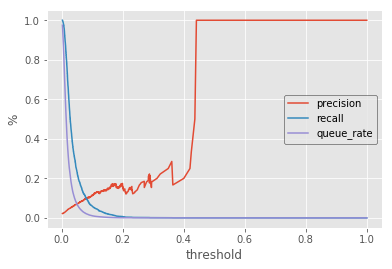

In [205]:
from sklearn.metrics import precision_recall_curve,average_precision_score
y_hat_probability = lg.predict_proba(X).T[1]
precision, recall, thresholds = precision_recall_curve(y, y_hat_probability) 
thresholds = np.append(thresholds, 1) 
queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((y_hat_probability >= threshold).mean()) 
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
dec = DecisionTreeClassifier(max_leaf_nodes = 8,min_samples_leaf = 5,max_depth=8 )
dec.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

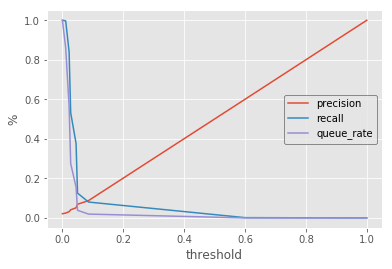

In [207]:
from sklearn.metrics import precision_recall_curve,average_precision_score
y_hat_probability = dec.predict_proba(X).T[1]
precision, recall, thresholds = precision_recall_curve(y, y_hat_probability) 
thresholds = np.append(thresholds, 1) 
queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((y_hat_probability >= threshold).mean()) 
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

In [211]:
pr = zip(precision, recall, thresholds,queue_rate)
pr = pd.DataFrame(pr,columns = ['precision','recall','thresholds','queue_rate'])
pr

,precision,recall,thresholds,queue_rate
0,0.021190,1.000000,0.000504,1.00000
1,0.024523,0.996697,0.011215,0.86123
2,0.031461,0.840491,0.022446,0.56610
3,0.041021,0.531855,0.027665,0.27474
4,0.051159,0.377065,0.045304,0.15618
5,0.069037,0.125531,0.050104,0.03853
6,0.087765,0.080227,0.086439,0.01937
7,0.600000,0.001416,0.600000,0.00005
8,1.000000,0.000000,1.000000,0.00000


I would select thresholds around 0.03 (0.028):
* queue_rate = 0.275 which means 27.5% of total population will be sent emails - save our cost
* precision = 0.041 which means among all the population I sent the emails, click rate is 4.1%
* recall = 0.532 which means among all the people who would click the link within the email, 53.2% of them I have sent the email. My model cover 53.2% of people who will click.

In [208]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = dec.predict_proba(X).T[1]  


print(y_hat_probability)
print("AUC is %f " %roc_auc_score(y, y_hat_probability)) 


vals = roc_curve(y, y_hat_probability) 
#vals[0] is False Positive Rate
#vals[1] is True Positive Rate

[ 0.02244646  0.02244646  0.02244646 ...,  0.04530387  0.00050443
  0.02244646]
AUC is 0.700013 


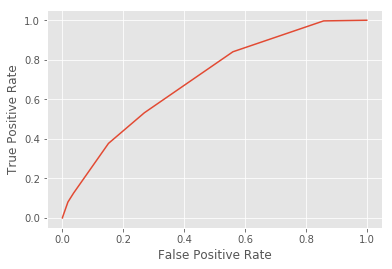

In [209]:
# show roc curve
plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

To test my model, should use A/B test and design an experiment. 